### 1. 문제정의
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어 보자!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. 데이터 수집

In [2]:
# 데이터 로드
bmi = pd.read_csv("bmi_500.csv")
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 3. 데이터 전처리

In [3]:
# 이상치, 결측치 확인 후 제거 또는 변경하기

In [4]:
bmi.info()
# 결측치 여부 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [5]:
# 이상치 확인
# 기술통계 확인

bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


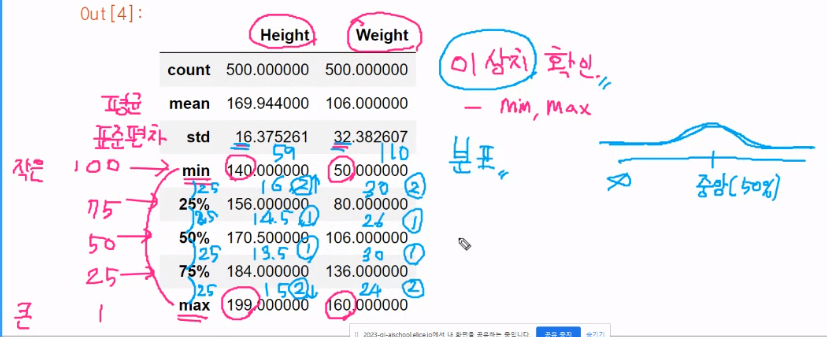

- 그래프, 통계값등을 확인해보자

In [6]:
# 비만도 등급 확인
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [7]:
# Obesity인 사람들의 데이터만 살펴보기
data1 = bmi[bmi['Label'] == "Obesity"]

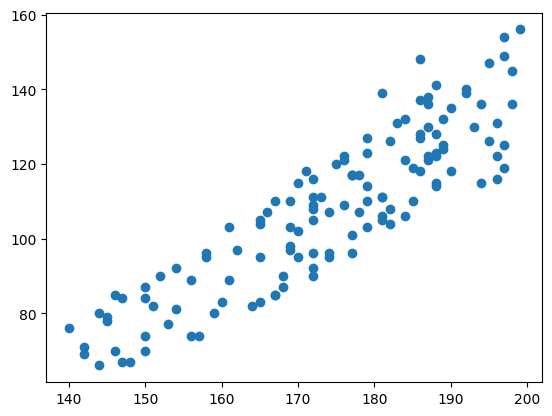

In [8]:
# Scatter 차트(산점도)를 사용해서 그래프로 표현
import matplotlib.pyplot as plt
plt.scatter(data1["Height"],data1['Weight'])
plt.show()

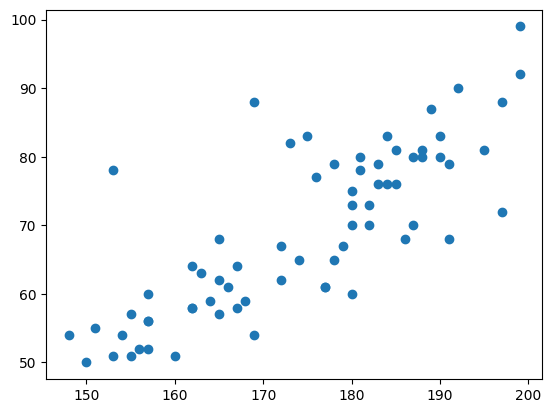

In [9]:
data1 = bmi[bmi['Label'] == "Normal"]
plt.scatter(data1["Height"],data1['Weight'])
plt.show()

In [10]:
def my_scatter(label,color):
    data1 = bmi[bmi['Label'] == label]
    plt.scatter(data1["Height"],data1['Weight'], c=color, label=label)

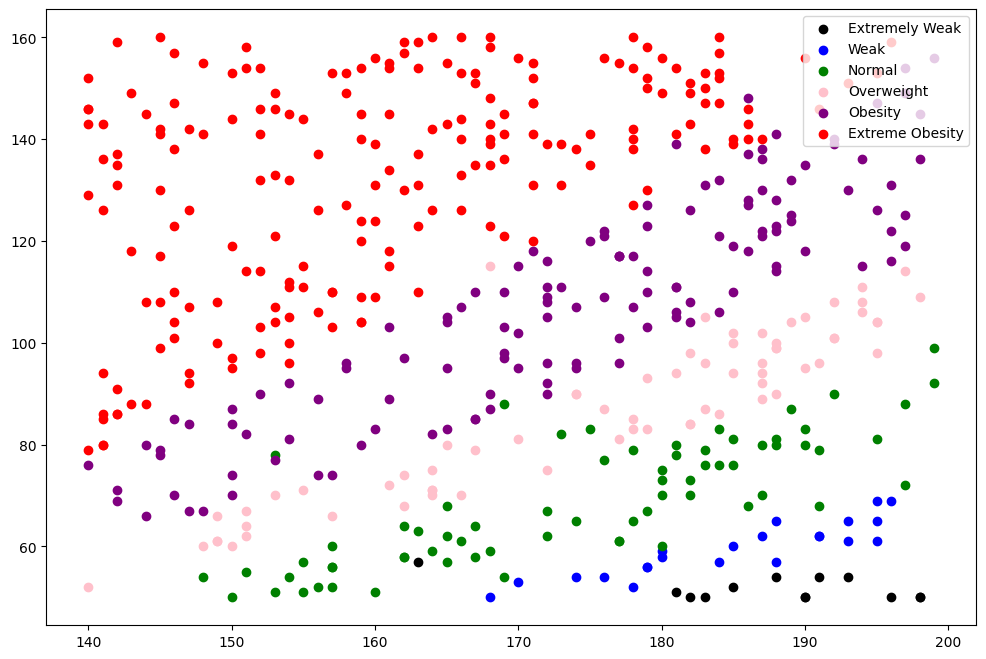

In [11]:
plt.figure(figsize=(12,8))
my_scatter('Extremely Weak','black')
my_scatter('Weak','blue')
my_scatter('Normal','green')
my_scatter('Overweight','pink')
my_scatter('Obesity','purple')
my_scatter('Extreme Obesity','red')
plt.legend()
plt.show()

In [12]:
# 1키가 153cm에 몸무게가 78kg인 사람의 라벨값(Normal > Obesity)을 변경
b = bmi['Label']=='Normal'
n = bmi[b]
b1 = n['Height'] == 153
n1 = n[b1]
b2 = n1['Weight'] == 78
n2 = n1[b2]
n1[b2]

,Gender,Height,Weight,Label
231,Female,153,78,Normal


In [13]:
n2.loc[231,'Label'] = 'Obesity'
n2.loc[231,'Label']

'Obesity'

### 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [14]:
# 데이터 분리
# 문제(X)와 답(y)으로 데이터 분리
# 훈련(train)과 평가(test)로 데이터를 분리 7:3
# 1. 규칙을 잘 찾아야함 > 평가를 하는 의미가 있다. > 훈련의 비중
# 2. 훈련 데이터의 비율을 수정할 수 있음
#    > 1) 데이터가 충분히 많다 >  훈련의 비율을 낮춰도 괜찮음
#    > 2) 데이터가 부족하다 > 훈련의 비율을 높게 
X=bmi.loc[:,'Height':'Weight']
y=bmi.loc[:,"Label"]

In [15]:
# 훈련(350) - train과 평가(150) - test로 분리
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

In [17]:
# 모델 불러오기
# 모델마다 규칙을 찾는 방법이 다르다
# 사용하는 모델마다 결과가 다르게 나옴
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


### 6. 학습

In [18]:
# 학습을 통해 데이터를 가장 장 설명하는 규칙 1개 찾기

# train(훈련) : 학습 시 데이터와 평가 시 데이터를 구분짓기 위함
knn.fit(X_train,y_train)

KNeighborsClassifier()

### 7. 평가 및 예측

In [19]:
# 평가
# 모델이 규칙을 얼마나 잘 찾았는가
# X_test로 예측값을 확인
# 실제 정답인 y_test와 비교
# 전체 데이터 중에 맞춘 비율을 출력
knn.score(X_test,y_test)

0.9066666666666666

In [20]:
# train 데이터는 규칙을 찾을 때 사용한 데이터이기 때문에
# 평가 결과가 보통 test보다 높음
knn.score(X_train,y_train)

0.9257142857142857

In [21]:
# 예측
# X데이터와 같은 형식
knn.predict(pd.DataFrame([[174,70]],columns=['Height','Weight']))

array(['Normal'], dtype=object)

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.8866666666666667

In [23]:
# 성별 컬럼을 학습 데이터에 추가하기
# Male = 0, Female = 1 > Mapping / 라벨 인코딩

In [24]:
bmi['Gender'] = bmi['Gender'].map({"Male":0,"Female":1})
bmi.head()

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight


In [25]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    int64 
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [26]:
# 데이터 나누기
X=bmi.loc[:,'Gender':'Weight']
y=bmi.loc[:,"Label"]

X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [27]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [28]:
# 학습
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
# 평가
# 성별은 비만도를 예측하는데 변인이 되지 않았다.
knn.score(X_test,y_test)

0.9066666666666666

In [30]:
# 예측

In [31]:
knn.predict(pd.DataFrame([[1,174,70]],columns=['Gender','Height','Weight']))

array(['Normal'], dtype=object)